In [1]:
#Import required packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
%matplotlib inline

C:\Users\sreekanth\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Load the csv file
loan=pd.read_csv("LoanStat.csv", low_memory=False)

In [3]:
loan= loan.drop(['desc', 'url'],axis=1)

In [4]:
#count half point of the dataset.# count 
half_point = len(loan) / 2
loan = loan.dropna(thresh=half_point, axis=1)
# we save the new file
loan.to_csv('loan.csv', index=False)

In [5]:
loan.shape

(42538, 53)

In [6]:
#Prepare a list with required columns
keep_list = ['addr_state', 'annual_inc','last_credit_pull_d', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status']

In [7]:
#New dataset with keep_list
loan_data=loan[keep_list]

In [8]:
loan_data['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [9]:
#Drop the columns having only one value in all rows
orig_columns = loan_data.columns
drop_columns = []
for col in orig_columns:
    col_series = loan_data[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
loan_data = loan_data.drop(drop_columns, axis = 1)
drop_columns

['application_type', 'initial_list_status']

In [10]:
#Identify number of null values in each column
loan_data.isnull().sum()

addr_state                 3
annual_inc                 7
last_credit_pull_d         7
dti                        3
earliest_cr_line          32
emp_length              1115
emp_title               2629
grade                      3
home_ownership             3
installment                3
int_rate                   3
issue_d                    3
loan_amnt                  3
loan_status                3
open_acc                  32
pub_rec                   32
pub_rec_bankruptcies    1368
purpose                    3
revol_bal                  3
revol_util                93
sub_grade                  3
term                       3
title                     16
total_acc                 32
verification_status        3
dtype: int64

In [11]:
#Drop the columns with null values more than half of length of dataset
half_point = len(loan_data) / 2
loan_data = loan_data.dropna(thresh=half_point, axis=1)

In [12]:
#Drop duplicates
loan_data.drop_duplicates()

loan_data.iloc[0]

addr_state                       AZ
annual_inc                    24000
last_credit_pull_d           Aug-18
dti                           27.65
earliest_cr_line             Jan-85
emp_length                10+ years
emp_title                       NaN
grade                             B
home_ownership                 RENT
installment                  162.87
int_rate                     10.65%
issue_d                      Dec-11
loan_amnt                      5000
loan_status              Fully Paid
open_acc                          3
pub_rec                           0
pub_rec_bankruptcies              0
purpose                 credit_card
revol_bal                     13648
revol_util                   83.70%
sub_grade                        B2
term                      36 months
title                      Computer
total_acc                         9
verification_status        Verified
Name: 0, dtype: object

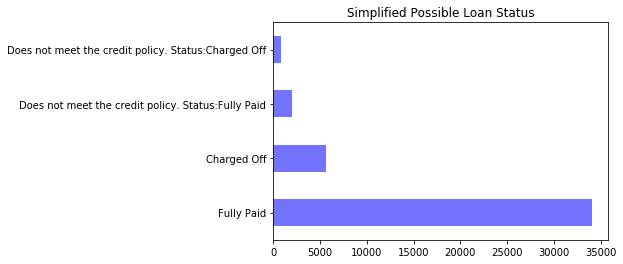

In [13]:
#Horizontal bar plot for loan_status
loan_data['loan_status'].value_counts().plot(kind= 'barh', color = 'blue', title = 'Simplified Possible Loan Status', alpha = 0.55)

In [14]:
#New dataset with data of loan_status in 'fully paid' or 'charged off'
loan_data= loan_data[(loan_data['loan_status'] == "Fully Paid") | (loan_data['loan_status'] == "Charged Off")]

AttributeError: module 'matplotlib' has no attribute 'show'

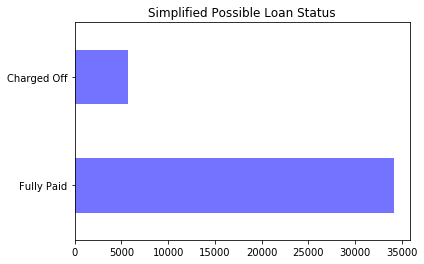

In [15]:
#Horizontal bar plot for loan_status

loan_data['loan_status'].value_counts().plot(kind= 'barh', color = 'blue', title = 'Simplified Possible Loan Status', alpha = 0.55)
plt.show()

In [16]:
#Change the loan_status column to binary
status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}
loan_data = loan_data.replace(status_replace)

In [17]:
#Value counts of loan_status column
loan_data['loan_status'].value_counts()

1    34116
0     5670
Name: loan_status, dtype: int64

In [18]:
#Impute null values of numerical data with mean
loan_data.fillna(loan_data.mean(),inplace=True)

In [19]:
#Remove emp_title column
loan_data.drop('emp_title',axis=1,inplace=True)

In [20]:
loan_data.shape

(39786, 24)

In [21]:
#Convert emp_length to numerical
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
loan_data = loan_data.drop(["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"], axis=1)
loan_data["int_rate"] = loan_data["int_rate"].str.rstrip("%").astype("float")
loan_data["revol_util"] = loan_data["revol_util"].str.rstrip("%").astype("float")
loan_data = loan_data.replace(mapping_dict)

In [22]:
loan_data.fillna("others",inplace=True)

In [23]:
#Prepare list of categorical cols
categorical_col=[]
for i in list(loan_data):
    if loan_data[i].dtypes=='object':
        categorical_col.append(i)

In [24]:
categorical_col

['emp_length',
 'grade',
 'home_ownership',
 'issue_d',
 'purpose',
 'revol_util',
 'sub_grade',
 'term',
 'verification_status']

In [25]:
#Create dummy columns for categorical to convert it into binary
dummy_df = pd.get_dummies(loan_data[categorical_col])
loan_data = pd.concat([loan_data, dummy_df], axis=1)
loan_data = loan_data.drop(categorical_col, axis=1)

In [26]:
loan_data.shape

(39786, 1234)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
loan_data.columns

Index(['annual_inc', 'dti', 'installment', 'int_rate', 'loan_amnt',
       'loan_status', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies',
       'revol_bal',
       ...
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'term_ 36 months', 'term_ 60 months',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified'],
      dtype='object', length=1234)

In [29]:
print(loan_data.dtypes.value_counts())

uint8      1223
float64      10
int64         1
dtype: int64


In [30]:
#Divide dataset in to features and response variable.
X = loan_data.loc[:,loan_data.columns!='loan_status']
y = loan_data.loc[:,loan_data.columns=='loan_status']

In [31]:
#Split the data into training and test dataset
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [32]:
#Logistic Regression model
import numpy as np

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

C:\Users\sreekanth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
#Confusion matrix with test and predicted response variables
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[    5  1775]
 [    6 10150]]


In [34]:
#Print accuracy of model
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [35]:
#Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.45      0.00      0.01      1780
          1       0.85      1.00      0.92     10156

avg / total       0.79      0.85      0.78     11936



In [36]:
#KFold Cross validation
from  sklearn  import  model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\sreekanth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sreekanth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sreekanth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sreekanth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

10-fold cross validation average accuracy: 0.860


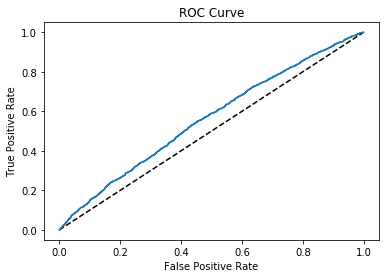

In [37]:
#ROC Curve
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt

# Compute predicted probabilities: y_pred_prob
y_pred_prob = classifier.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()